In [59]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [60]:
store_data = pd.read_excel("data/ItemList.xlsx", header=None)
store_data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,canned beer,misc. beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sausage,hygiene articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,soda,pickled vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14963 entries, 0 to 14962
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       14963 non-null  object
 1   1       14963 non-null  object
 2   2       4883 non-null   object
 3   3       2185 non-null   object
 4   4       795 non-null    object
 5   5       451 non-null    object
 6   6       276 non-null    object
 7   7       196 non-null    object
 8   8       51 non-null     object
 9   9       1 non-null      object
 10  10      1 non-null      object
dtypes: object(11)
memory usage: 1.3+ MB


In [62]:
records = []
for i in range(0, store_data.shape[0]):
     records.append([str(store_data.values[i,j]) for j in range(0, store_data.shape[1])])

In [63]:
records[0]

['sausage',
 'whole milk',
 'semi-finished bread',
 'yogurt',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan']

In [64]:
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.shape

(14963, 168)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14963 entries, 0 to 14962
Columns: 168 entries, Instant food products to zwieback
dtypes: bool(168)
memory usage: 2.4 MB


In [66]:
df.head(3)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [67]:
df.tail()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14962,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [68]:
df.columns

Index(['Instant food products', 'UHT-milk', 'abrasive cleaner',
       'artif. sweetener', 'baby cosmetics', 'bags', 'baking powder',
       'bathroom cleaner', 'beef', 'berries',
       ...
       'turkey', 'vinegar', 'waffles', 'whipped/sour cream', 'whisky',
       'white bread', 'white wine', 'whole milk', 'yogurt', 'zwieback'],
      dtype='object', length=168)

In [69]:
df = df.drop(['nan'], axis=1)

In [70]:
frequent_itemsets = apriori(df, min_support= 0.001, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.001470,(abrasive cleaner)
3,0.001938,(artif. sweetener)
4,0.008087,(baking powder)


In [71]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric="confidence", min_threshold= 0.001)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168
1,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755
2,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060
3,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443
4,(UHT-milk),(rolls/buns),0.021386,0.110005,0.001804,0.084375,0.767013,-0.000548,0.972009
...,...,...,...,...,...,...,...,...,...
1233,"(whole milk, sausage)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681
1234,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541
1235,(whole milk),"(yogurt, sausage)",0.157923,0.005748,0.001470,0.009310,1.619866,0.000563,1.003596
1236,(yogurt),"(whole milk, sausage)",0.085879,0.008955,0.001470,0.017121,1.911760,0.000701,1.008307


In [72]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beverages),(sausage),0.016574,0.060349,0.001537,0.092742,1.536764,0.000537,1.035704
1,(sausage),(beverages),0.060349,0.016574,0.001537,0.025471,1.536764,0.000537,1.009129
2,(citrus fruit),(specialty chocolate),0.053131,0.015973,0.001403,0.026415,1.653762,0.000555,1.010726
3,(specialty chocolate),(citrus fruit),0.015973,0.053131,0.001403,0.087866,1.653762,0.000555,1.038081
4,(sausage),(curd),0.060349,0.033683,0.002941,0.048726,1.446615,0.000908,1.015814
5,(curd),(sausage),0.033683,0.060349,0.002941,0.087302,1.446615,0.000908,1.029531
6,(yogurt),(detergent),0.085879,0.008621,0.001069,0.012451,1.444261,0.000329,1.003878
7,(detergent),(yogurt),0.008621,0.085879,0.001069,0.124031,1.444261,0.000329,1.043555
8,(flour),(tropical fruit),0.009757,0.067767,0.001069,0.109589,1.617141,0.000408,1.046969
9,(tropical fruit),(flour),0.067767,0.009757,0.001069,0.015779,1.617141,0.000408,1.006118


In [73]:
print(rules.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         26 non-null     object 
 1   consequents         26 non-null     object 
 2   antecedent support  26 non-null     float64
 3   consequent support  26 non-null     float64
 4   support             26 non-null     float64
 5   confidence          26 non-null     float64
 6   lift                26 non-null     float64
 7   leverage            26 non-null     float64
 8   conviction          26 non-null     float64
dtypes: float64(7), object(2)
memory usage: 2.0+ KB
None


In [83]:
# "Có sausage không? nó kết hợp với item nào?"
for row in rules.iterrows():   
    if "sausage" in row[1][0]:
        print(row)

(1, antecedents             (sausage)
consequents           (beverages)
antecedent support      0.0603489
consequent support      0.0165742
support                0.00153712
confidence              0.0254707
lift                      1.53676
leverage               0.00053689
conviction                1.00913
Name: 1, dtype: object)
(4, antecedents             (sausage)
consequents                (curd)
antecedent support      0.0603489
consequent support      0.0336831
support                0.00294059
confidence              0.0487265
lift                      1.44662
leverage              0.000907851
conviction                1.01581
Name: 4, dtype: object)
(19, antecedents                    (sausage)
consequents           (whole milk, soda)
antecedent support             0.0603489
consequent support             0.0116287
support                        0.0010693
confidence                     0.0177187
lift                             1.52371
leverage                     0.000367526

In [75]:
support=rules['support'].values
confidence=rules['confidence'].values
lift = rules['lift'].values

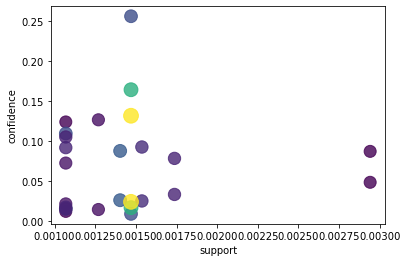

In [76]:
import random
import matplotlib.pyplot as plt

# for i in range (len(support)):
#     support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
#     confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)   

plt.scatter(support, confidence, s= lift*100,alpha=0.8, c = lift)
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [77]:
result = df.apply(pd.value_counts).fillna(0)
result

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
False,14903,14643,14941,14934,14960,14959,14842,14946,14455,14637,...,14883,14912,14686,14309,14955,14604,14788,12600,13678,14903
True,60,320,22,29,3,4,121,17,508,326,...,80,51,277,654,8,359,175,2363,1285,60


In [84]:
df_true = result.iloc[1,:]
df_true[:15]

Instant food products     60
UHT-milk                 320
abrasive cleaner          22
artif. sweetener          29
baby cosmetics             3
bags                       4
baking powder            121
bathroom cleaner          17
beef                     508
berries                  326
beverages                248
bottled beer             678
bottled water            908
brandy                    38
brown bread              563
Name: True, dtype: int64

In [92]:
x_best = df_true.sort_values(ascending=False)

In [96]:
fifteen_products_best = x_best[:15]
fifteen_products_best

whole milk          2363
other vegetables    1827
rolls/buns          1646
soda                1453
yogurt              1285
root vegetables     1041
tropical fruit      1014
bottled water        908
sausage              903
citrus fruit         795
pastry               774
pip fruit            734
shopping bags        712
canned beer          702
bottled beer         678
Name: True, dtype: int64

In [97]:
import numpy as np
pos = np.arange(len(fifteen_products.values))

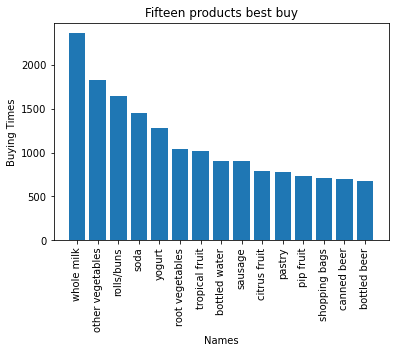

In [98]:
import matplotlib.pyplot as plt
plt.bar(pos, fifteen_products_best.values, align='center')
plt.xticks(pos, fifteen_products_best.keys(), rotation='vertical')
plt.ylabel('Buying Times')
plt.xlabel('Names')
plt.title('Fifteen products best buy')
plt.show()

In [100]:
x_worst = df_true.sort_values(ascending=True)
fifteen_products_worst = x_worst[:15]
fifteen_products_worst

preservation products     1
kitchen utensil           1
baby cosmetics            3
bags                      4
frozen chicken            5
toilet cleaner            5
rubbing alcohol           5
make up remover           5
salad dressing            6
whisky                    8
decalcifier               9
hair spray                9
liqueur                   9
organic products         10
specialty vegetables     11
Name: True, dtype: int64

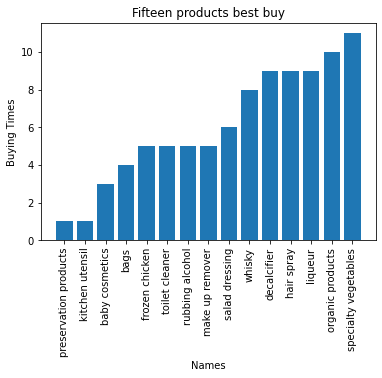

In [101]:
import matplotlib.pyplot as plt
plt.bar(pos, fifteen_products_worst.values, align='center')
plt.xticks(pos, fifteen_products_worst.keys(), rotation='vertical')
plt.ylabel('Buying Times')
plt.xlabel('Names')
plt.title('Fifteen products best buy')
plt.show()